# Author

Daniel Soto

# Introduction

I'd like to see how well the kVA and kWh values match.
Right now I am assuming that they are equivalent but I haven't confirmed that assumption.

# Method

Integrate kVA to form a kVA-hour and compare with kWh visually.


# Results

Visually, the kVA-hour total and the kWh total are within about 10% of each other over the three month period.
I'm suprised that the integrated sliding window demand kVA is below the kWh export.
It's possible that the samples lost at the beginning of each day while the window fills are enough to account for the lag.
It looks like using kVA and kW interchangeably is acceptable for the accuracy of work I'm doing in the SFC calculations.

# Next Work

None planned.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import WP19_analysis as wpa

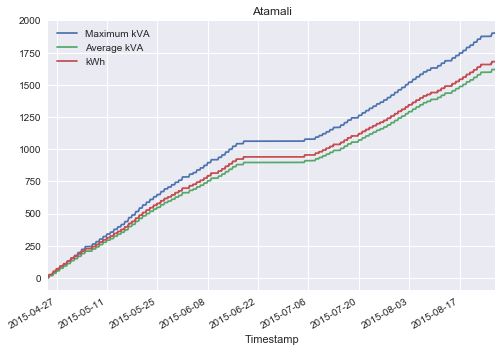

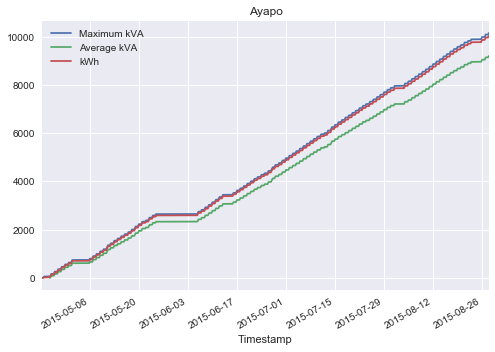

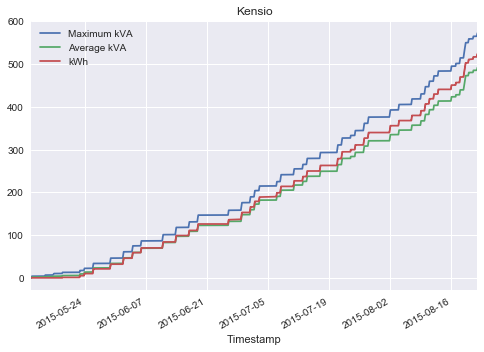

In [3]:
for rfd in wpa.raw_file_data[2:]:
    vname = rfd['village_name']
    energy_data = wpa.load_timeseries_file(vname + '-clean.csv')
    # should I zero-fill?
    # what is the right way to integrate?
    # can I compare the voltage current product
    (energy_data['Maximum real-time Total kVA'].cumsum()/60).plot(label='Maximum kVA')
    (energy_data['kVA sliding window Demand'].cumsum()/60).plot(label='Average kVA')
    energy_data['kWh export'].plot(label='kWh')
    plt.legend()
    plt.title(vname.capitalize())
    plt.show()
    #messages = wpa.load_message_file(vname + '-messages.csv')
    #print(vname)